# 零售促銷：分析促銷對銷售的影響

## 概覽  
本專案探討促銷折扣對每週銷售額的影響，使用一組真實且匿名化的零售數據集。起初為一般的探索性資料分析（EDA）練習，後來演變成聚焦於哪種折扣策略能帶來可衡量的銷售提升，以及這些效應何時出現的深入研究。

此分析旨在協助零售決策，辨識每種店鋪類型最有效的折扣形式，以及其影響最明顯的時間窗口。

## 資料集  
資料集為真實亞馬遜匿名零售數據，包含三張表格，總計超過40萬筆資料，16個獨特變數。涵蓋5種折扣量、每週銷售額、店鋪類型（A、B、C）等因素。折扣量代表每週在五個（匿名化）類別中所應用的促銷折扣。

## 核心問題  
- 促銷活動是否與更高的每週銷售額有相關性？  
- 店鋪類型是否為影響銷售及促銷效果的重要因素？  
- 應在多長的時間（週數）內衡量銷售額，以最佳捕捉促銷效果？  

## 主要發現  
### 店鋪類型的模式？  
- A 與 B 類店鋪展現相似的銷售趨勢，C 類店鋪則具獨特性。  
- 店鋪類型亦強烈影響促銷策略的成效。  
### 哪些折扣事件效果最好？  
- 對於 A 與 B 類店鋪，折扣事件 3 與 5 對銷售有顯著影響，其他折扣則無明顯效應，折扣活動 5 在所有促銷類型中擁有最高的投資報酬率（ROI）。  
- 對於 C 類店鋪，折扣事件 1 對銷售有統計上顯著影響，其他折扣無顯著效應。  
### 何時衡量促銷事件的效果？  
- A 與 B 類店鋪，促銷效果在以4至5週向前滾動平均銷售額衡量時最強。  
- C 類店鋪，折扣事件 1 分別在以5-6週向前滾動平均銷售額衡量時效果最佳。  

## 商業建議  
### 對於 A 與 B 類店鋪  
- 將預算從折扣事件 1 與 4 調整至 **折扣事件 3 與 5**。  
- 尤其加大對 **折扣事件 5** 的投入（ROI 較高且目前使用不足）。  
- 以 **4-5 週** 向前滾動平均銷售額衡量折扣事件 3 與 5 的效果。  
### 對於 C 類店鋪  
- 將預算從折扣事件 3 與 4 調整至 **折扣事件 1 與 5**。  
- 以 **5-6 週** 向前滾動平均銷售額衡量折扣事件 1 的效果。   

## 限制  
- 其他相關分析請參見 *附錄*。  
- 有數項可能有趣的結果因樣本不足（或大量缺值）無法確信陳述。  
- 是否為假日似乎會影響折扣事件的效果。  
- 需收集更多折扣事件 2 的資料以進行更可靠分析。  
- 其他因素如 **消費者物價指數（CPI）**、**油價**、**氣溫** 的影響尚未充分探討。  

資料來源：https://www.kaggle.com/datasets/manjeetsingh/retaildataset/data



# 環境設定

In [136]:
# Import data analysis packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm # for linear regression

In [137]:
# Load the data
features = pd.read_csv(r'.\data\Features data set.csv')
sales = pd.read_csv(r'.\data\sales data-set.csv')
stores = pd.read_csv(r'.\data\stores data-set.csv')

# 清理並探索 *features*

In [138]:
display(features.info())
# There are many missing values, especially for MD 1-5
display(features.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


None

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [139]:
# Convert to datetime object
features.Date = pd.to_datetime(features.Date, dayfirst = True)
# Convert the temperature into Celsius (more familiar)
features.Temperature = (features.Temperature - 32) * (5/9)

In [140]:
# NaN handling
features[features.Date > '2011-11-30'].isna().sum()
# Quite messy. Values for different columns are missing at different dates. Handle later depending on what variables I need.

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1         17
MarkDown2       1118
MarkDown3        426
MarkDown4        561
MarkDown5          0
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

## 單變量分析

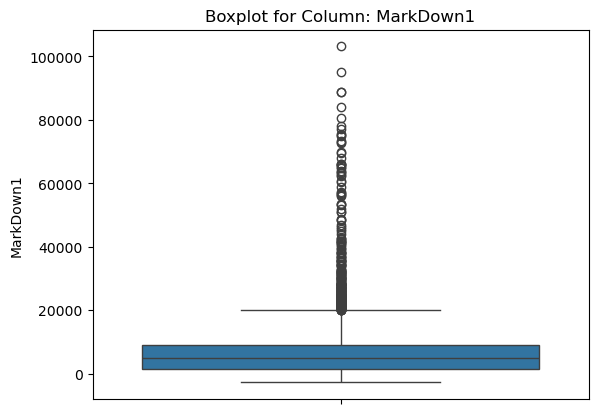

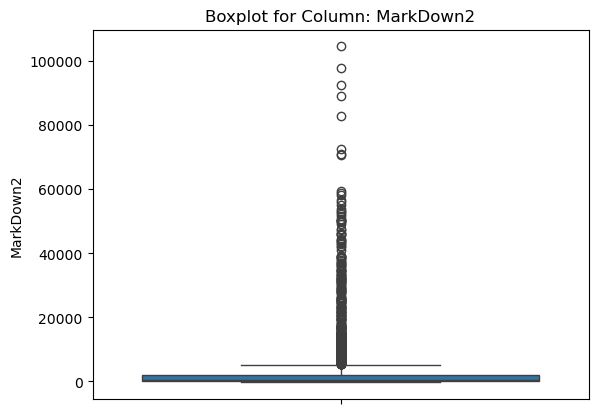

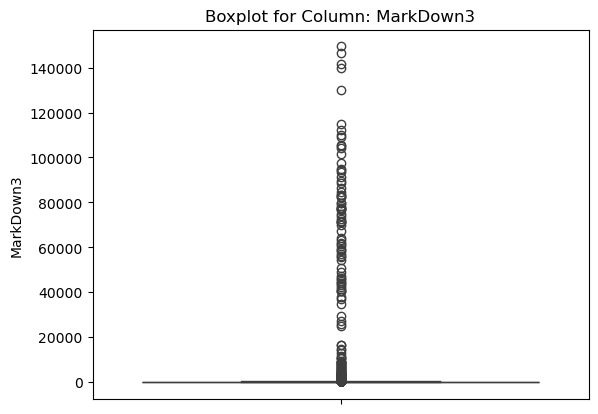

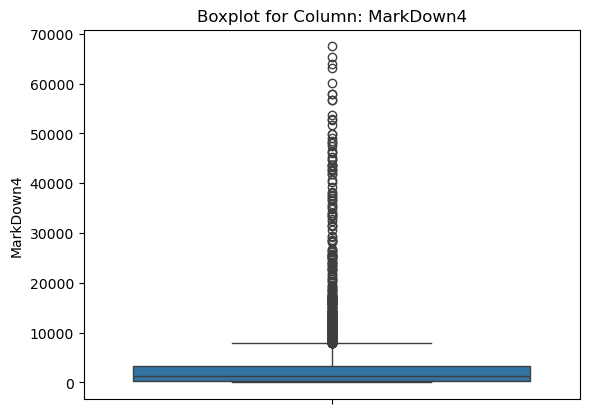

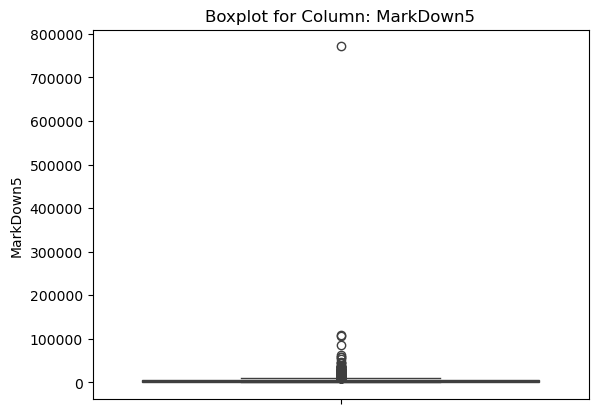

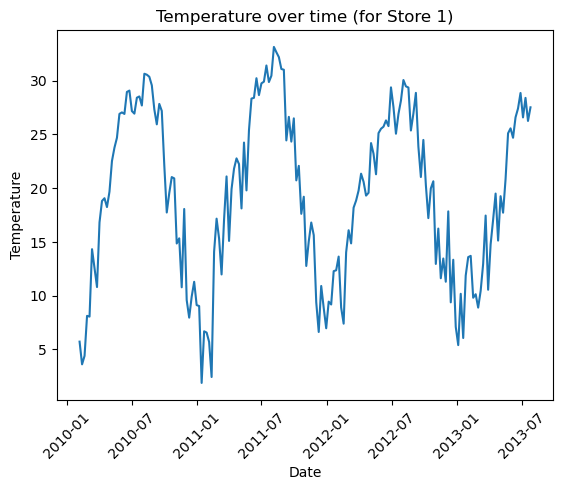

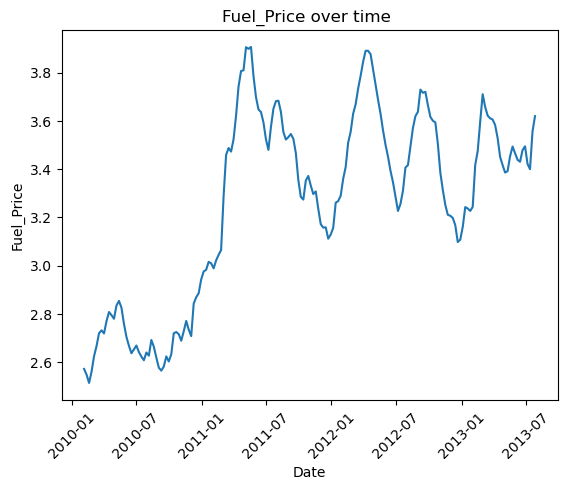

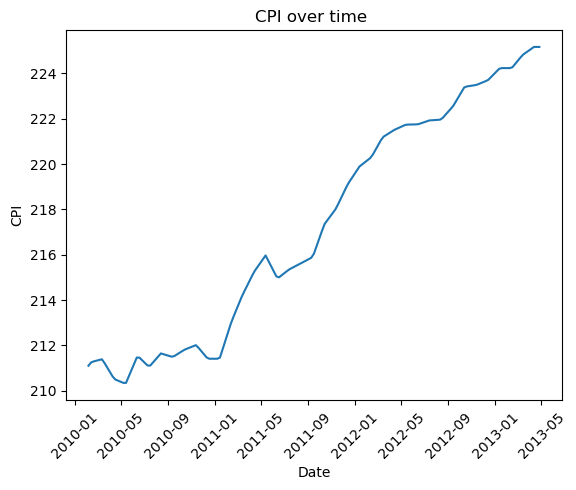

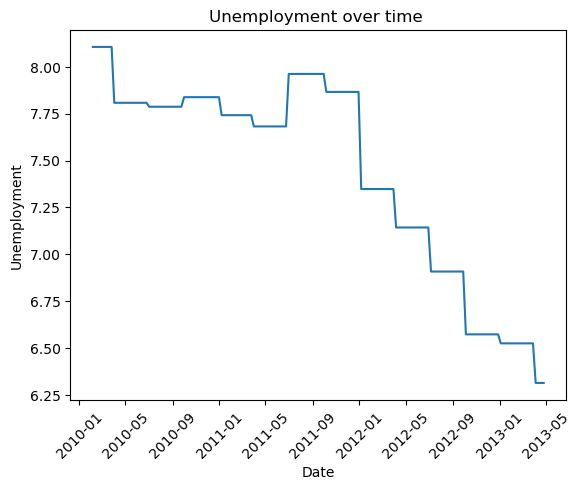

In [141]:
# Univariate analysis: boxplot of Markdown 1 to Markdown
for col in features.columns[4:9]: # Temperature to Unemployment
    sns.boxplot(features[col])
    plt.title(f'Boxplot for Column: {col}')
    plt.show()

# Univariate analysis: Line plot for temperature, fuel price, CPI, unemployment
for col in ['Temperature','Fuel_Price','CPI', 'Unemployment']:
    sns.lineplot(data = features[features.Store == 1], x = 'Date', y = col)
    plt.xticks(rotation = 45)
    plt.title(f'{col} over time {'(for Store 1)' if col == 'Temperature' else ''}')
    plt.show()

- 折扣量（Markdown volumes）中存在許多異常值，顯示折扣可能集中在某些時段批量發生。  
- 溫度、油價、消費者物價指數（CPI）與失業率趨勢較為穩定。

<IntegerArray>
[6, 36, 47, 52]
Length: 4, dtype: UInt32

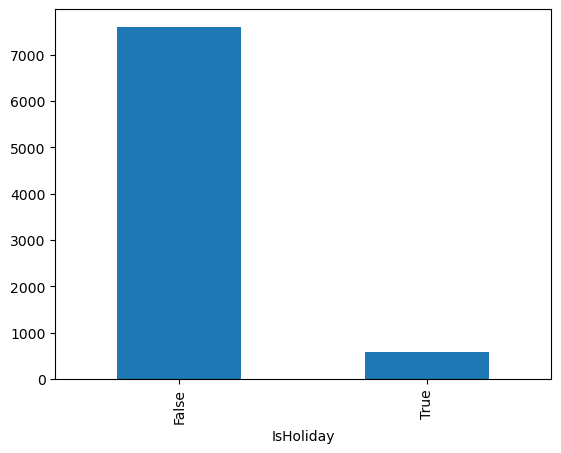

In [143]:
# Univariate Analysis: histogram for IsHoliday

features.IsHoliday.value_counts().plot(kind = 'bar')
features.IsHoliday.value_counts(normalize = True)

# When are the holidays? (match it to 'week' for later analysis of weekly sales data)
display(features[features.IsHoliday == True].Date.dt.isocalendar().week.unique())
# The holidays fall on Week #6, 36, 47, 52
# Stores it for later use
holidays = features[features.IsHoliday == True].Date.dt.isocalendar().week.unique()


| 假日    | 非假日   |
|---------|---------|
| 7%      | 93%     |

- 假日明顯對應美國的主要節日。  
- 大部分資料並非假日。


## 雙變量（相關性）分析

,MarkDown1,MarkDown4
MarkDown1,1.00,0.81
MarkDown4,0.81,1.00


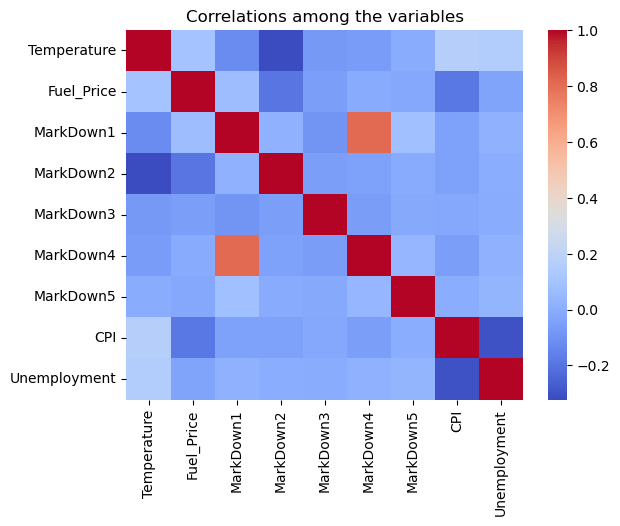

In [144]:
# Bivariate analysis
sns.heatmap(features.drop(['Store', 'Date', 'IsHoliday'], axis = 1).corr(), cmap="coolwarm")
plt.title('Correlations among the variables')

# MD 1 vs MD 4 correlaton: 0.81
features[['MarkDown1', 'MarkDown4']].dropna().corr().round(2)


- 變數間大部分相關性偏低，這對後續線性回歸有利，可避免多重共線性問題。  
- 唯一例外為折扣事件 MD 1 與 MD 4，相關係數高達 0.81。

## 比較：折扣事件 Markdown 1-5

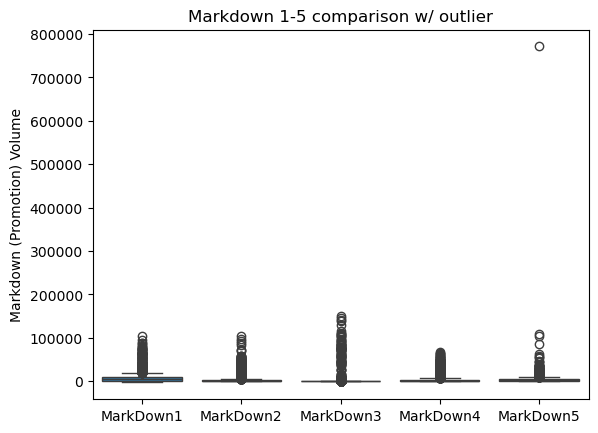

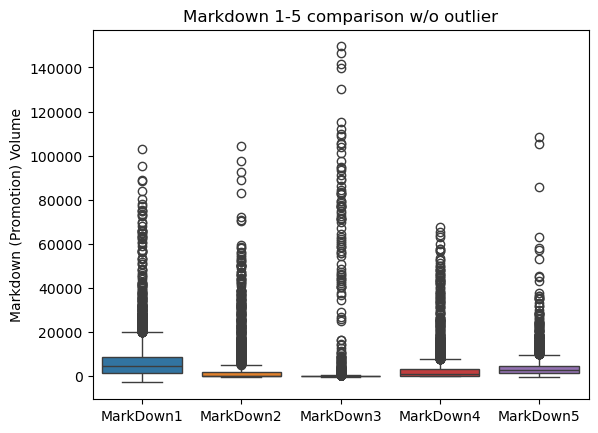

In [145]:
# boxplots of MD 1-5 side by side
sns.boxplot(features.iloc[:,4:9])
plt.title('Markdown 1-5 comparison w/ outlier')
plt.ylabel('Markdown (Promotion) Volume')
plt.show()

# Without the extreme outlier for MD 5
sns.boxplot(features.drop(index = 5059).iloc[:,4:9])
plt.title('Markdown 1-5 comparison w/o outlier')
plt.ylabel('Markdown (Promotion) Volume')
plt.show()

- 所有事件的促銷值都會有突發性跳升，可能與特定活動或節假日有關，且這些跳升不持續。  
- 折扣事件 1、4 與 5 較為穩定且持續使用。  
- 折扣事件 3 並非定期使用，且偶爾有極端值。

# 清理並探索 *sales*（銷售資料）

In [146]:
display(sales.info())
display(sales.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


None

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


- 這兩組資料都很乾淨，沒有缺失值（NA）。  

In [147]:
# Convert to datetime object
sales.Date = pd.to_datetime(sales.Date, dayfirst = True)

In [148]:
# 'dept' variable
sales.groupby('Store')['Dept'].nunique().describe()

count    45.000000
mean     74.022222
std       5.654800
min      61.000000
25%      74.000000
50%      77.000000
75%      77.000000
max      79.000000
Name: Dept, dtype: float64

- 總共有45家店鋪，每家平均有74個部門。  
- 部門數量有相當的差異。

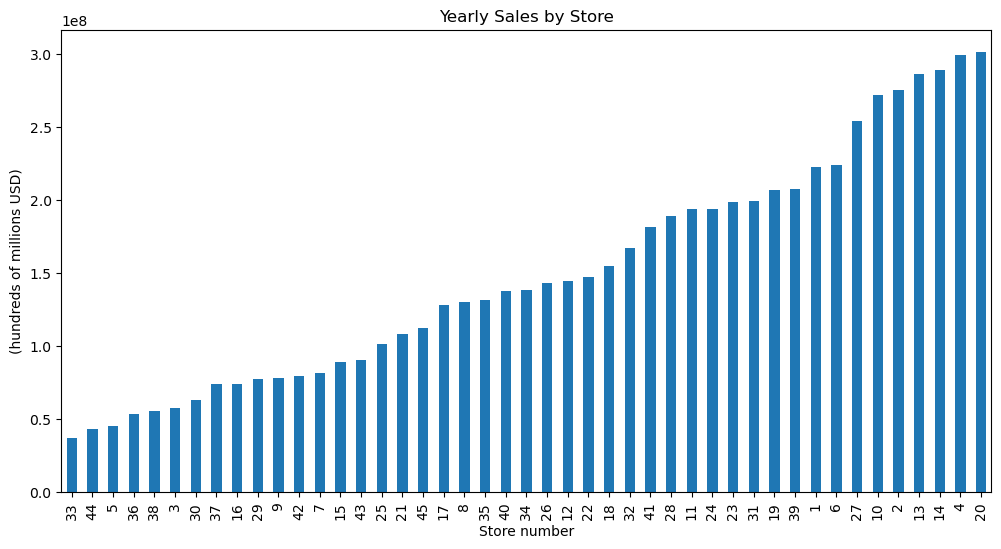

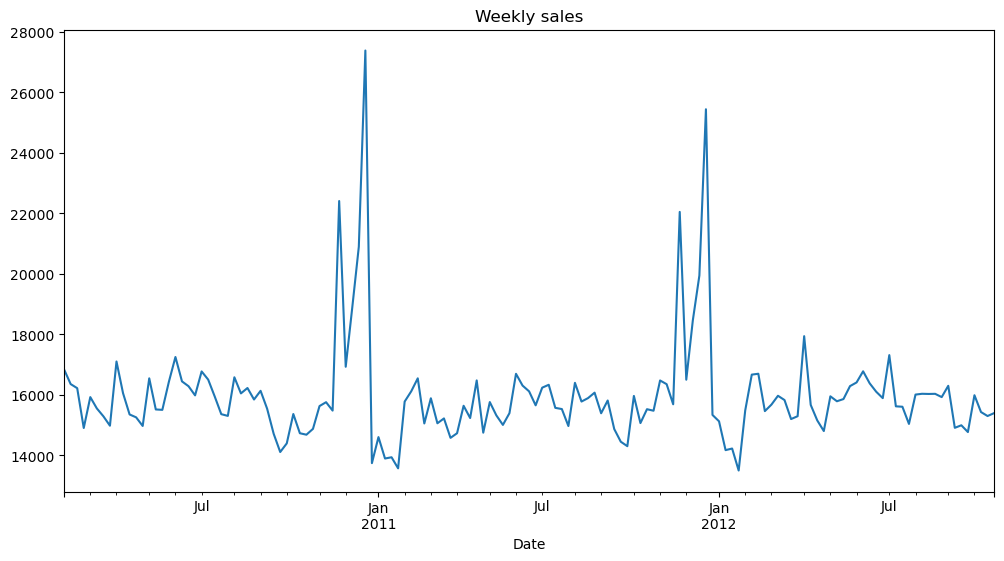

In [149]:
# Total sales vs store
plt.figure(figsize = (12, 6))
sales.groupby('Store')['Weekly_Sales'].sum().sort_values().plot(kind = 'bar')
plt.title('Yearly Sales by Store')
plt.ylabel('(hundreds of millions USD)')
plt.xlabel('Store number')
plt.show()

# Weekly sales vs Week
plt.figure(figsize = (12, 6))
sales.groupby('Date')['Weekly_Sales'].mean().plot(kind = 'line')
plt.title('Weekly sales')
plt.show()

- 各店鋪的年銷售額差異很大。  
- **重要** 從折線圖可見規律的年度及季節性模式，最高銷售額出現在年底。  
- 這促使我繪製5種折扣事件隨時間變化的折線圖，並與每週銷售額比較。（見下一部分）

## 比較：折扣量隨時間的變化

In [150]:
# Prepare the data for plotting
# After some exprimentation, the date column is messy and disorganized. 
# Therefore I create a 'Yaer_Week' column and aggregate all the markdown events in the same week.
features_md = features.copy()
iso_temp = features_md.Date.dt.isocalendar()
features_md['Year'] = iso_temp['year']
features_md['Week'] = iso_temp['week']
features_md = features_md.groupby(['Year','Week'])[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].sum().reset_index()
features_md['Year_Week'] = features_md.Year.astype('str') + '-W' + features_md.Week.astype('str')
features_md.head()

,Year,Week,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Year_Week
0,2010,5,0.0,0.0,0.0,0.0,0.0,2010-W5
1,2010,6,0.0,0.0,0.0,0.0,0.0,2010-W6
2,2010,7,0.0,0.0,0.0,0.0,0.0,2010-W7
3,2010,8,0.0,0.0,0.0,0.0,0.0,2010-W8
4,2010,9,0.0,0.0,0.0,0.0,0.0,2010-W9


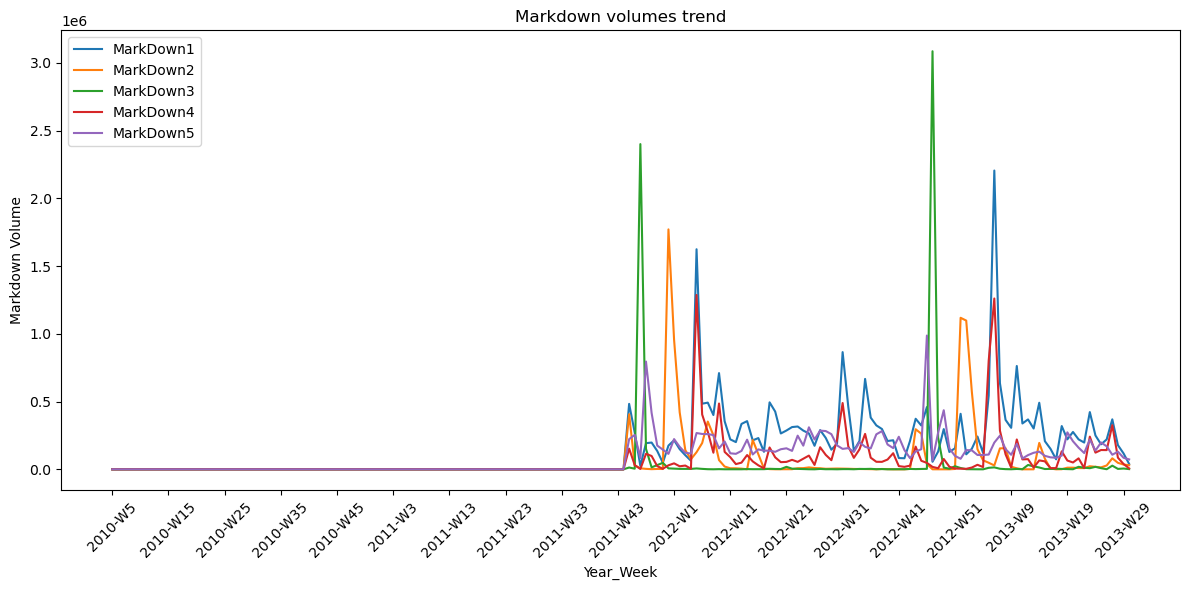

In [151]:
# Line plot for Markdown events

plt.figure(figsize=(12, 6))
for col in features_md.columns[2:7]:
    sns.lineplot(data = features_md, x = 'Year_Week', y = col, label = col)
    ticks = range(0, round(len(features_md)), 10)
    plt.xticks(ticks, rotation = 45)
    plt.ylabel('Markdown Volume')
    plt.legend(loc = 'upper left')
    plt.tight_layout()
    plt.title('Markdown volumes trend')


- 折扣值有大量缺失是預期之中。  
- **重要** 可觀察到所有折扣的年度趨勢。

# 清理並探索：*stores*（店鋪）

In [152]:
display(stores.info())
display(stores.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


None

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [153]:
# How many types of stores are there?
stores.Type.unique()

array(['A', 'B', 'C'], dtype=object)

In [ ]:
# Type vs Size of a store
display(stores.groupby('Type')['Size'].agg(['count','mean']).round())

,count,mean
Type,,
A,22,177248.0
B,17,101191.0
C,6,40542.0


- A 與 B 類型店鋪佔大多數。  
- 從店鋪大小比較來看，可依大小將店鋪分類：

| 店鋪類型 | 店鋪大小 |
|----------|----------|
| A        | 大型     |
| B        | 中型     |
| C        | 小型     |

## **假設**  
**店鋪類型是銷售及折扣事件的主要影響因素。**

In [155]:
# sales vs type

# Prepare the dataframe for plotting
sales_type = pd.merge(sales, stores, on = 'Store')
iso_temp = sales_type.Date.dt.isocalendar()
sales_type['Year'] = iso_temp['year']
sales_type['Week'] = iso_temp['week']
sales_type = sales_type.groupby(['Type','Year','Week'])['Weekly_Sales'].sum().reset_index()
sales_type['Year_Week'] = sales_type.Year.astype('str') + '-W' + sales_type.Week.astype('str')
sales_type.head()

,Type,Year,Week,Weekly_Sales,Year_Week
0,A,2010,5,32144126.25,2010-W5
1,A,2010,6,30982570.79,2010-W6
2,A,2010,7,31000072.76,2010-W7
3,A,2010,8,28008995.99,2010-W8
4,A,2010,9,30020543.60,2010-W9


Text(0.5, 1.0, 'Weekly Sales by Store Types')

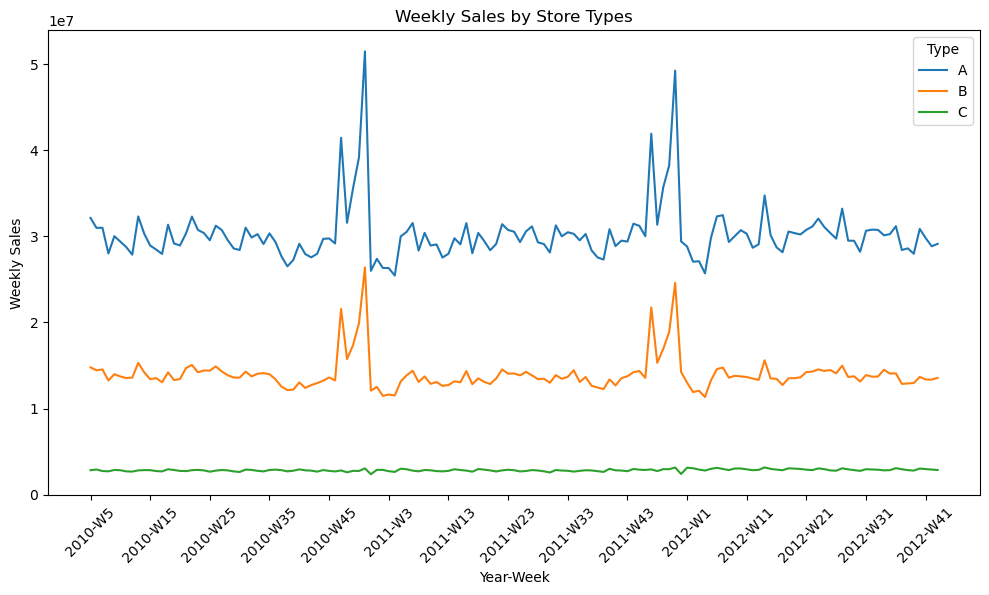

In [156]:
# Line plot for sales by store types

plt.figure(figsize=(10, 6))
sns.lineplot(data = sales_type, x = 'Year_Week', y = 'Weekly_Sales', hue = 'Type')
ticks = range(0, round(len(sales_type)/3), 10)
plt.xticks(ticks, rotation = 45)
plt.ylabel('Weekly Sales')
plt.xlabel('Year-Week')
plt.tight_layout()
plt.title('Weekly Sales by Store Types')

# 洞察 1  
- 店鋪類型是否為銷售的主要因素？答案是肯定的。  
- **重要** 三種類型之間存在顯著差異：  
    - 銷售量：A > B > C  
    - 銷售波動：A > B > C  
    - C 類店鋪在可觀察期間銷售較為穩定。  
- **重要** 仔細觀察三種店鋪的趨勢，銷售皆呈現年度週期性模式，例如：  
    - 年底有兩個大幅銷售高峰  
    - 年初有輕微的銷售下滑  

# 折扣量 vs 銷售 vs 店鋪類型  
## 資料準備  
說明：  
- 三種店鋪類型各自展現截然不同的銷售模式與銷售量。因此在探討折扣事件對銷售的影響時，將依店鋪類型分組分析。  
- 為了開始分析折扣量（促銷量）與銷售的關係，首先需處理 *features* 表中的缺失值。  
- *sales* 表的時間範圍為 **2010-02-05** 至 **2012-10-26**，*features* 表為 **2010-02-05** 至 **2013-07-26**。根據資料提供者說明，折扣量在 **2011-11-01** 之前未記錄。為了產生有效分析，選擇缺失值最少的一年區間。  
- 先前分析顯示折扣及銷售均呈現規律的年度趨勢，因此選擇這一年度期間是合理的。  

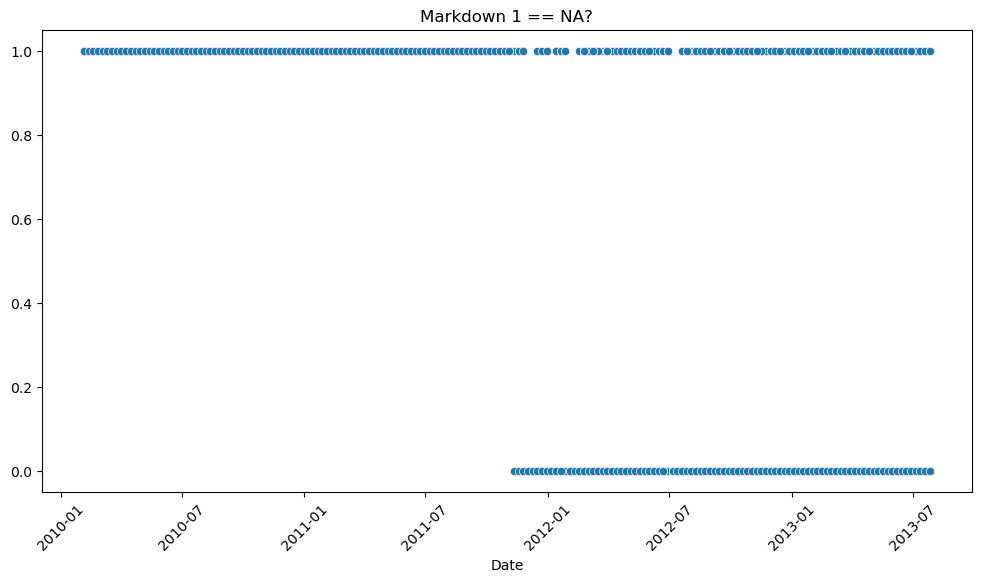

<class 'pandas.core.frame.DataFrame'>
Index: 2295 entries, 92 to 8150
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MarkDown1  2280 non-null   float64
 1   MarkDown2  1637 non-null   float64
 2   MarkDown3  2046 non-null   float64
 3   MarkDown4  1965 non-null   float64
 4   MarkDown5  2295 non-null   float64
dtypes: float64(5)
memory usage: 107.6 KB


None

The percentage of NA values:


MarkDown1    0.01
MarkDown2    0.29
MarkDown3    0.11
MarkDown4    0.14
MarkDown5    0.00
dtype: float64

In [157]:
# Scatterplot to visualize where the NA values fall

plt.figure(figsize = (12, 6))
sns.scatterplot(x = features.Date, y = features.MarkDown3.isna())
plt.xticks(rotation = 45)
plt.ylabel('')
plt.title('Markdown 1 == NA?')
plt.show()

display(features[(features.Date >= '2011-11-1') & (features.Date <= '2012-10-26')& (features.MarkDown5 < 500000)].iloc[:,4:9].info())
print('The percentage of NA values:')
display((features[(features.Date >= '2011-11-1') & (features.Date <= '2012-10-26')& (features.MarkDown5 < 500000)].iloc[:,4:9].isna().sum()/2295).round(2))


經過繪圖與試驗後，選擇以下一年期間作分析：**2011-11-01** 至 **2012-10-26**。  

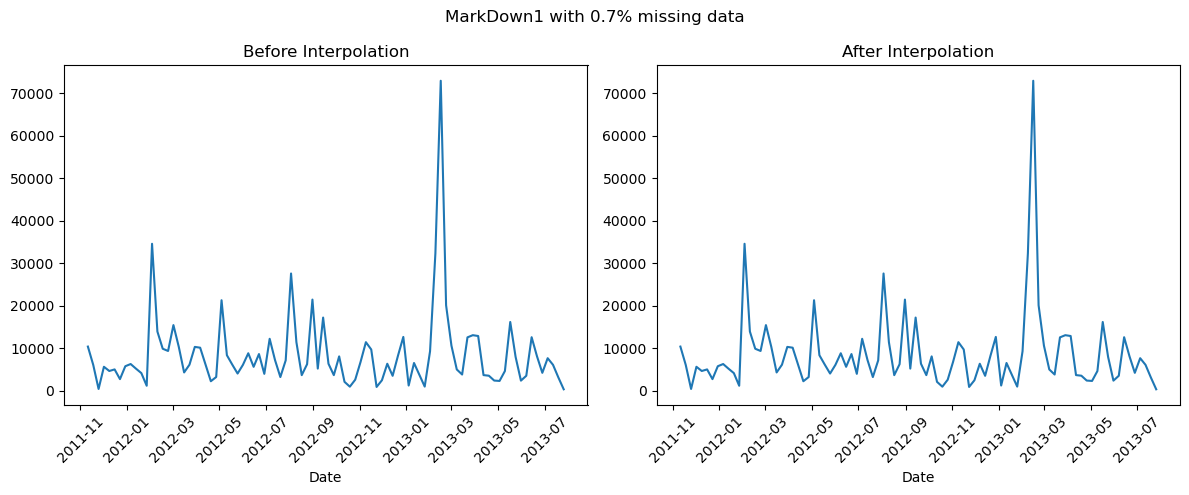

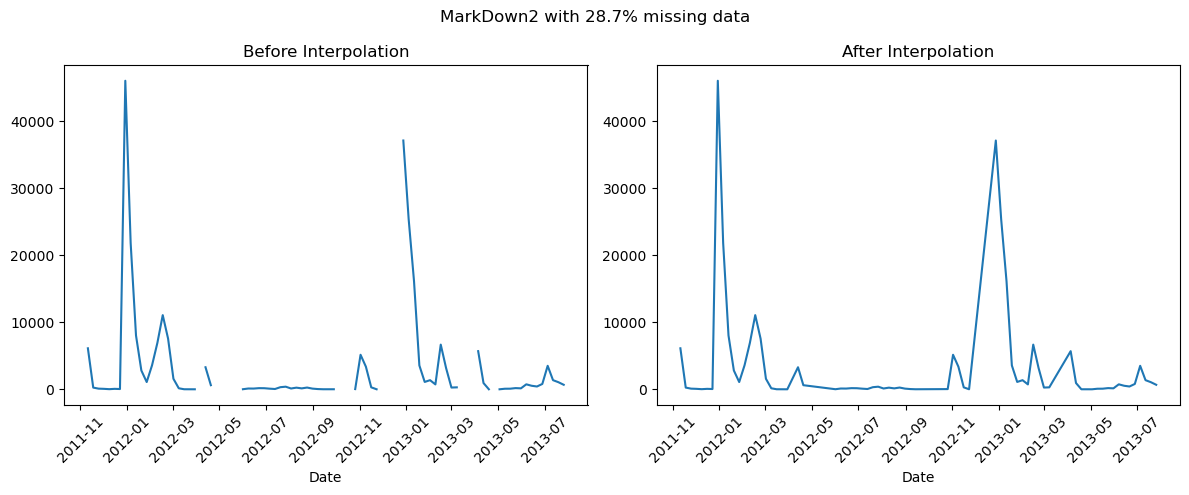

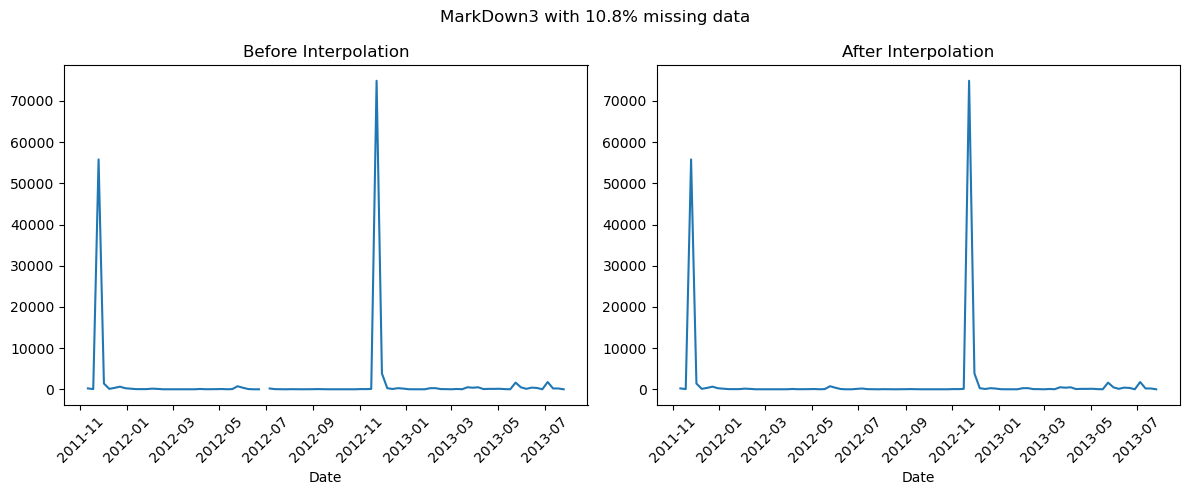

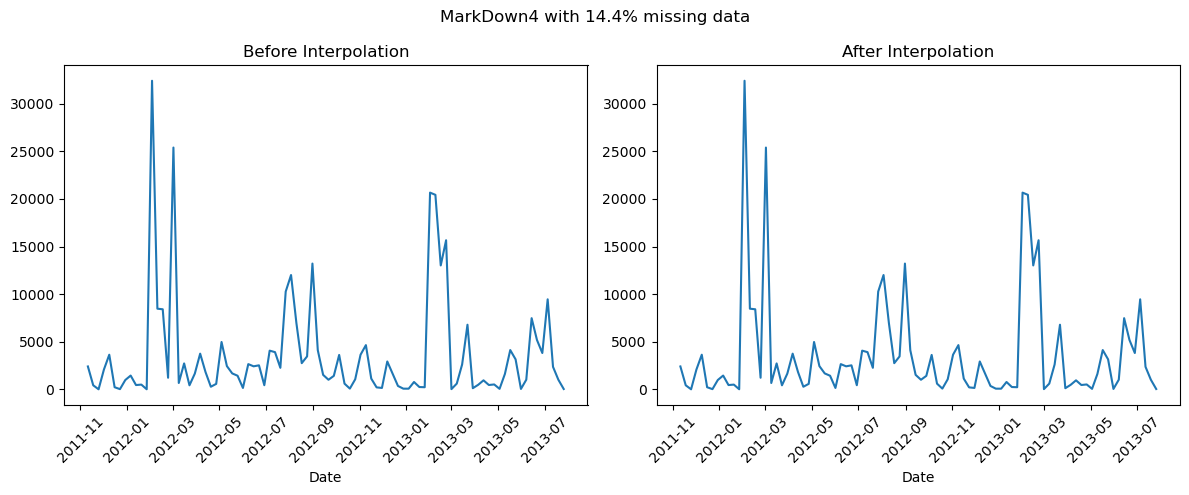

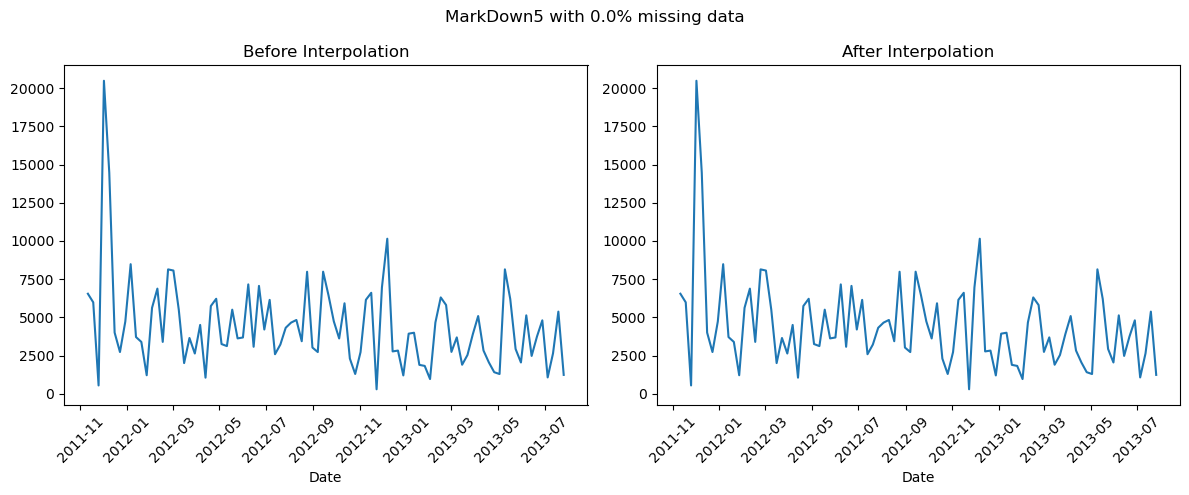

In [158]:
# Line plots before and after interpolation()

missing_percentage = (features[(features.Date >= '2011-11-1') & (features.Date <= '2012-10-26')& (features.MarkDown5 < 500000)].iloc[:,4:9].isna().sum()/2295)
missing_percentage = round(missing_percentage*100, 1)


for col in features.columns[4:9]:

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Add figsize parameter
    
    axs[0].plot(features[features.Store == 1].Date, features[features.Store == 1][col])
    axs[0].set_xlabel('Date')
    axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axs[0].set_title('Before Interpolation')
    
    axs[1].plot(features[features.Store == 1].Date, features[features.Store == 1].interpolate()[col])
    axs[1].set_xlabel('Date')
    axs[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axs[1].set_title('After Interpolation')
    
    fig.suptitle(f'{col} with {missing_percentage[col]}% missing data')
    
    plt.tight_layout()
    plt.show()

### 使用interpolation()的理由  
- 折扣事件 1 與 5 幾乎沒有缺失資料，可直接使用。  
- 折扣事件 2 約缺失 30% 資料，因資料不足將排除於後續分析。  
- 折扣事件 3 大多數時間為低值，年底有突增，折線圖趨勢一致。  
- 折扣事件 4 缺失約 15%，但缺失資料分布零散，適合使用interpolation()。  


In [159]:
# Data frame preparation: features_md_type
# a) interpolation, b) creating year_week for plotting, c) filter the pre-specified time period

features_temp = features[(features.Date >= '2011-11-1') & (features.Date <= '2012-10-26')].copy() # filter the time
features_temp = pd.merge(features_temp.interpolate(), stores[['Store','Type']], on = 'Store') # interpolate & add store type variable
iso_temp = features_temp.Date.dt.isocalendar()
features_temp['Year'] = iso_temp['year'] 
features_temp['Week'] = iso_temp['week']
features_md_type = features_temp.groupby(['Type','Year','Week'])[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].sum().reset_index()
features_md_type['Year_Week'] = features_md_type.Year.astype('str') + '-W' + features_md_type.Week.astype('str') # create year_week variable
features_md_type.head()

,Type,Year,Week,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Year_Week
0,A,2011,44,202957.870000,137443.785,4.732079e+03,61942.982706,90551.65,2011-W44
1,A,2011,45,309299.090000,279361.400,7.992670e+03,103798.505556,149018.70,2011-W45
2,A,2011,46,159451.450000,20482.660,3.383647e+03,17627.993333,154433.87,2011-W46
3,A,2011,47,13328.840000,6091.905,1.401767e+06,2736.206111,46709.11,2011-W47
4,A,2011,48,121253.446667,3119.228,9.810963e+04,73985.408889,491249.29,2011-W48


In [160]:
# Data frame preparation: sales_type_1 (sales_type already exists)
# filter sales_type date

sales_type_1 = pd.merge(sales[(sales.Date >= '2011-11-1') & (sales.Date <= '2012-10-26')], stores, on = 'Store')
iso_temp = sales_type_1.Date.dt.isocalendar()
sales_type_1['Year'] = iso_temp['year']
sales_type_1['Week'] = iso_temp['week']
sales_type_1 = sales_type_1.groupby(['Type','Year','Week'])['Weekly_Sales'].sum().reset_index()
sales_type_1['Year_Week'] = sales_type_1.Year.astype('str') + '-W' + sales_type_1.Week.astype('str')
sales_type_1.head()

,Type,Year,Week,Weekly_Sales,Year_Week
0,A,2011,44,31468858.72,2011-W44
1,A,2011,45,31225985.27,2011-W45
2,A,2011,46,30017098.94,2011-W46
3,A,2011,47,41922781.18,2011-W47
4,A,2011,48,31351316.25,2011-W48


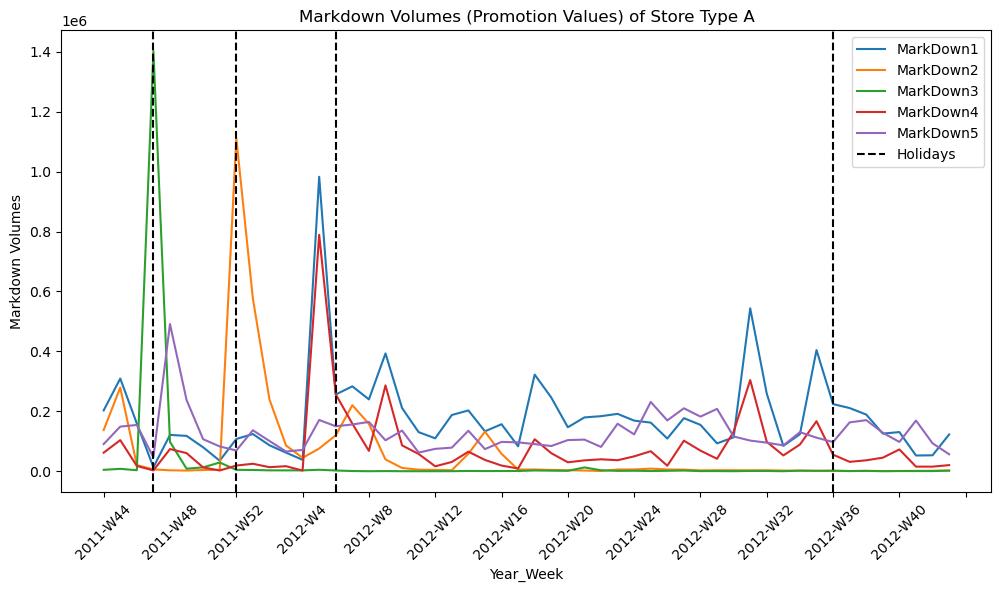

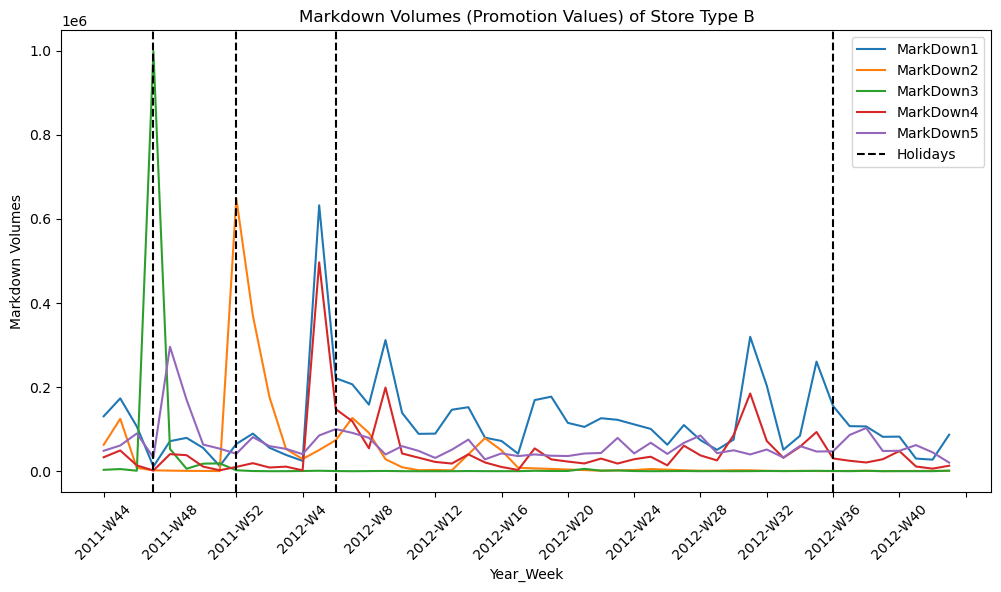

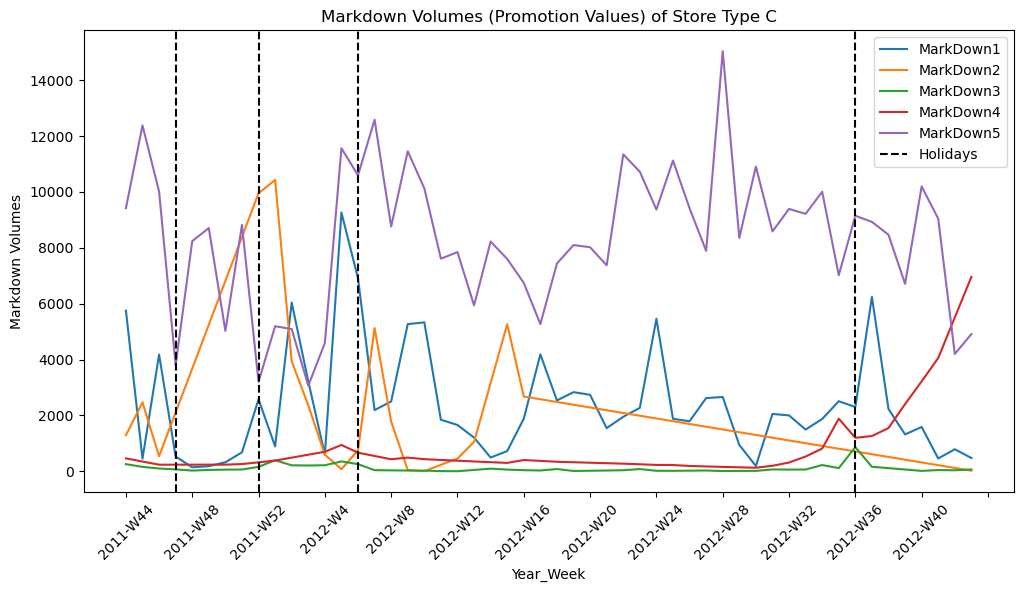

In [161]:
# Line plot of Markdown trends by Store Type

types = ['A','B','C']
MDs = features_md_type.columns[3:8]
holidays = ['2012-W6','2012-W36','2011-W47','2011-W52']

for type in types:
    plt.figure(figsize = (12, 6))
    for MD in MDs:
        sns.lineplot(data = features_md_type[features_md_type.Type == type], x = 'Year_Week', y = MD, label = MD)
    plt.title(f'Markdown Volumes (Promotion Values) of Store Type {type}')
    plt.ylabel('Markdown Volumes')
    plt.xticks(rotation = 45, ticks = range(0, 53, 4))
    for holiday in holidays: # add holidays
        plt.axvline(x = holiday, linestyle = '--', color = 'black')
    plt.plot([], [], linestyle='--', color='black', label='Holidays') # add 'Holidays' to legend
    plt.legend()
    plt.show()

- 店鋪類型 A 與 B 採用相似促銷策略：  
    - 折扣活動 2、3 僅在特定假期使用，非定期。  
    - 折扣活動 1、4 通常在假期前使用，且較為規律。  
    - 折扣活動 5 使用頻率較低。  
- 店鋪類型 C 的促銷策略明顯不同：  
    - 折扣活動 5 使用頻率較高。  
    - 促銷與假期間無明顯規律。  
    - 折扣活動 3 不常使用。  

促銷事件通常對每週銷售有滯後效應，因此我建立了向前滾動平均來與折扣量比較。

In [162]:
# Separate into three types

sales_A = sales_type_1[sales_type_1.Type == 'A']
sales_B = sales_type_1[sales_type_1.Type == 'B']
sales_C = sales_type_1[sales_type_1.Type == 'C']

features_md_A = features_md_type[features_md_type.Type == 'A']
features_md_B = features_md_type[features_md_type.Type == 'B']
features_md_C = features_md_type[features_md_type.Type == 'C']

首次嘗試設定滾動期間為 4 週。

In [163]:
# Creating the rolling average colume
def create_rolling_average(df, n):
    df_copy = df.copy()
    df_copy['Rolling_average'] = df_copy.Weekly_Sales.rolling(window = n).mean().shift(-n+1)
    return df_copy.dropna() # dropna because rolling averages introduces NA columns at the end

# Join the data frames
def merge_sales_md(sales_df, md_df):
    return pd.merge(sales_df, md_df, on = ['Type','Year_Week'])
    
# Specify the rolling period: try 4 weeks first
rolling_period = 4

sales_md_A = merge_sales_md(create_rolling_average(sales_A, rolling_period), features_md_A)
sales_md_B = merge_sales_md(create_rolling_average(sales_B, rolling_period), features_md_B)
sales_md_C = merge_sales_md(create_rolling_average(sales_C, rolling_period), features_md_C)

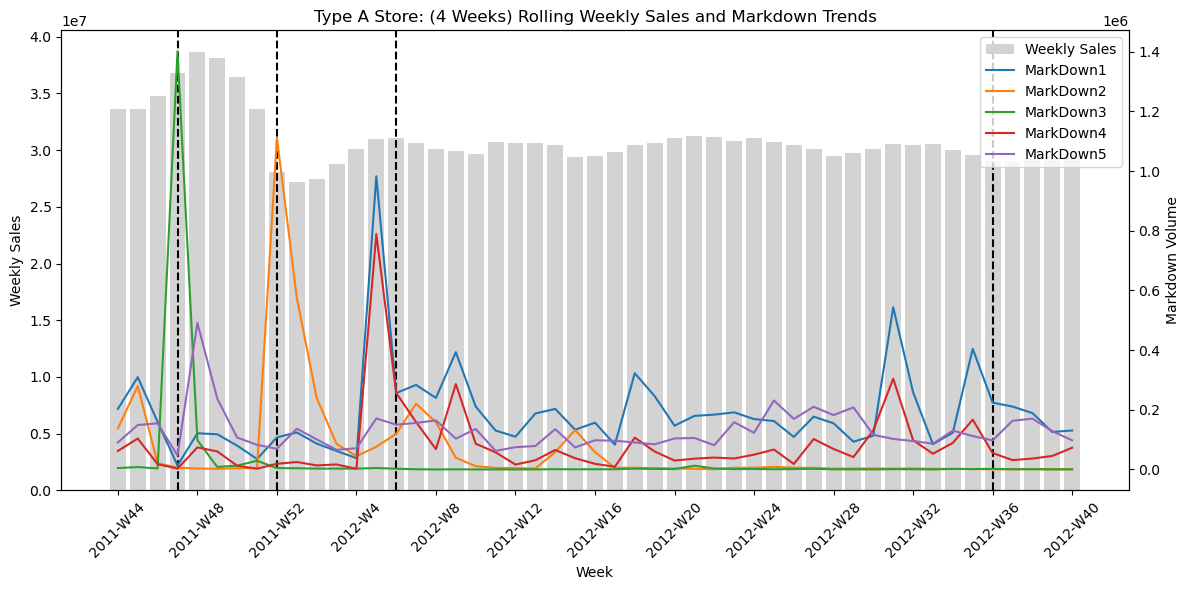

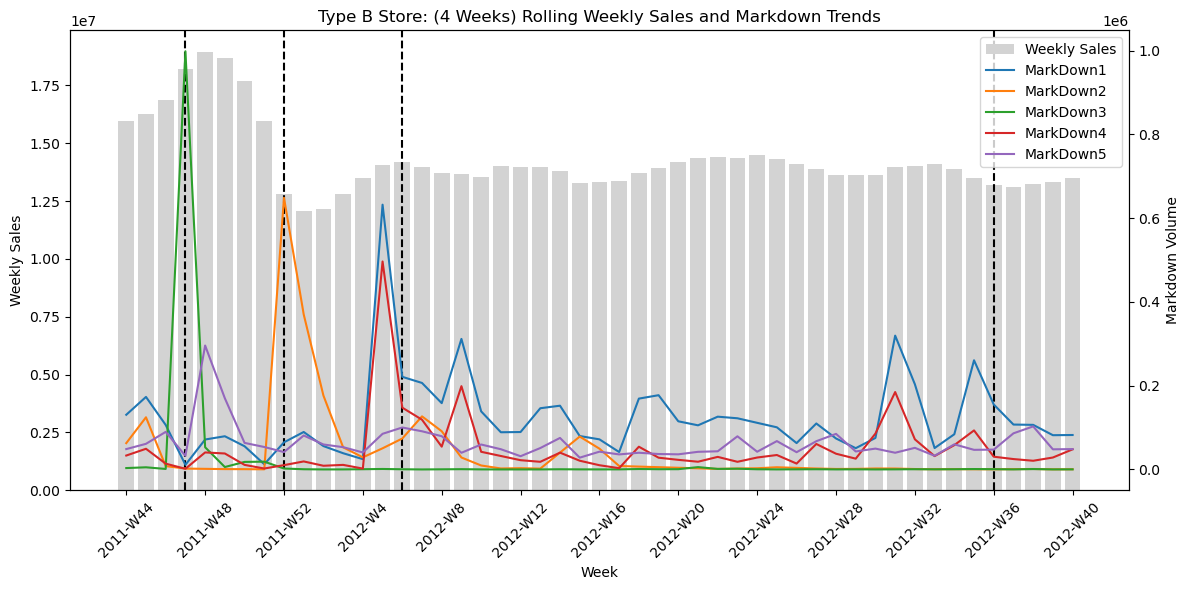

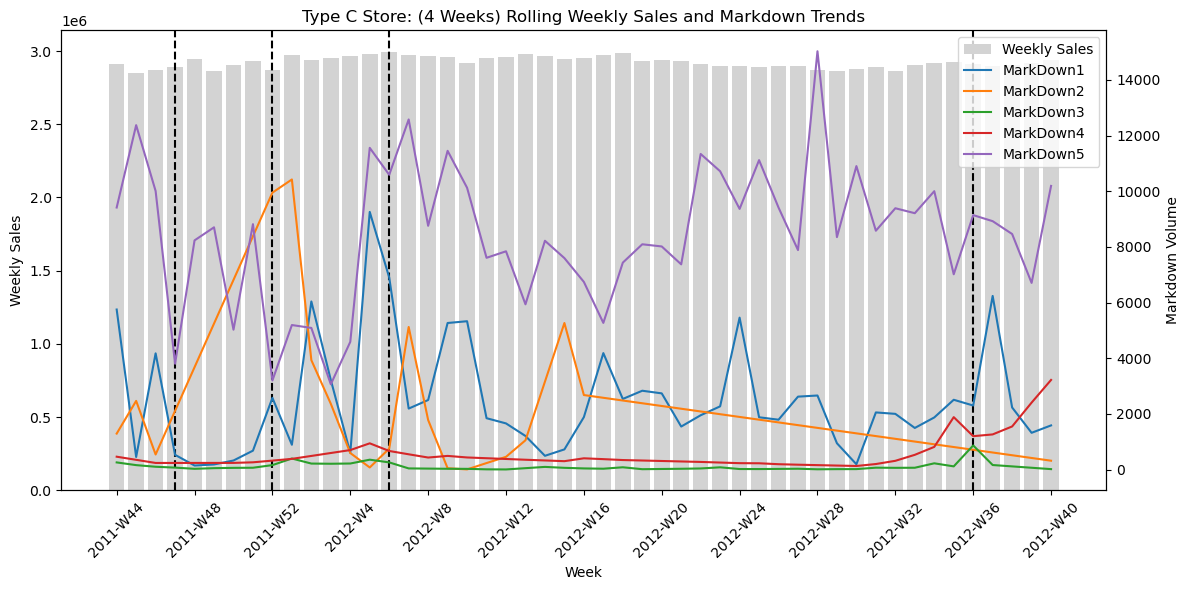

In [164]:
dfs = [sales_md_A, sales_md_B, sales_md_C]

for i, df in enumerate(dfs):

    fig, ax1 = plt.subplots(figsize=(12,6))

    # Bar chart on left y-axis
    ax1.bar(df['Year_Week'], df['Rolling_average'], color='lightgray', label = 'Weekly Sales')
    ax1.set_ylabel('Weekly Sales', color='black')
    ax1.set_xlabel('Week')
    ax1.tick_params(axis='y', labelcolor='black')
    ticks = range(0, len(df), 4)
    ax1.set_xticks(ticks)
    ax1.set_xticklabels(df['Year_Week'].iloc[ticks], rotation=45)

    # Line plots on right y-axis
    ax2 = ax1.twinx()
    for MD in MDs:
        sns.lineplot(data = df, x='Year_Week', y=MD, ax=ax2, label=MD)
    ax2.set_ylabel('Markdown Volume', color='black')
    ax2.tick_params(axis='y', labelcolor='black')

    # Add holiday markers
    for holiday in holidays:
        ax1.axvline(x = holiday, linestyle='--', color='black')

    # Combine legends from both axes
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(handles1 + handles2, labels1 + labels2, loc='upper right')

    # Title and layout
    plt.title(f'Type {types[i]} Store: (4 Weeks) Rolling Weekly Sales and Markdown Trends')
    plt.tight_layout()
    plt.show()

# 洞察 2  
- 對於 A 與 B 類店鋪，  
    - 折扣事件 3 恰逢假日，帶來明顯的銷售提升。  
    - 折扣事件 2 雖然碰上較晚的假日，但銷售並未提升，可能因為不久前的巨大銷售高峰造成後續銷售動能減弱。  
- 對於 C 類店鋪，  
    - 每週銷售全年穩定。  
    - 無明顯假日或折扣事件影響銷售。  


# 問題 1  
折扣事件是否與每週銷售量相關？  

接下來使用線性回歸模型來回答此問題，並衡量促銷活動的影響（若有）。  

## 相關係數熱力圖  (heatmap)

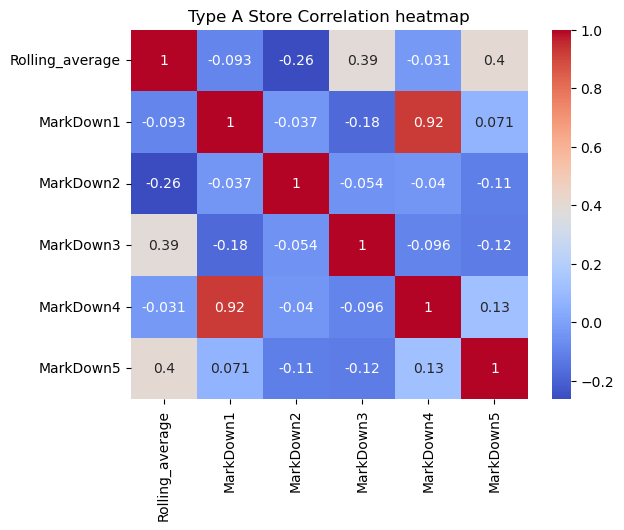

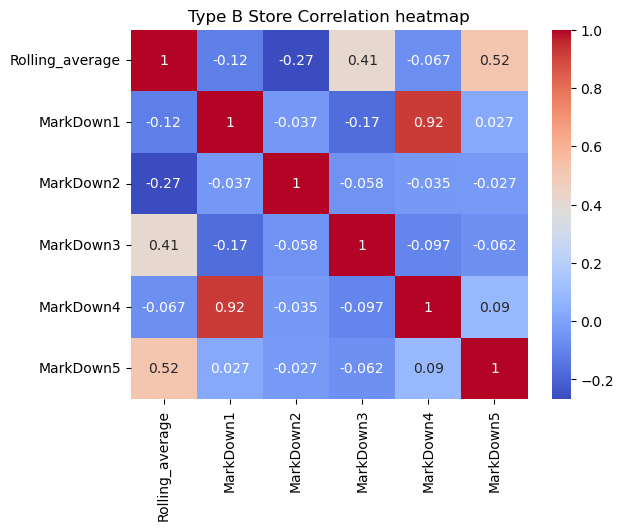

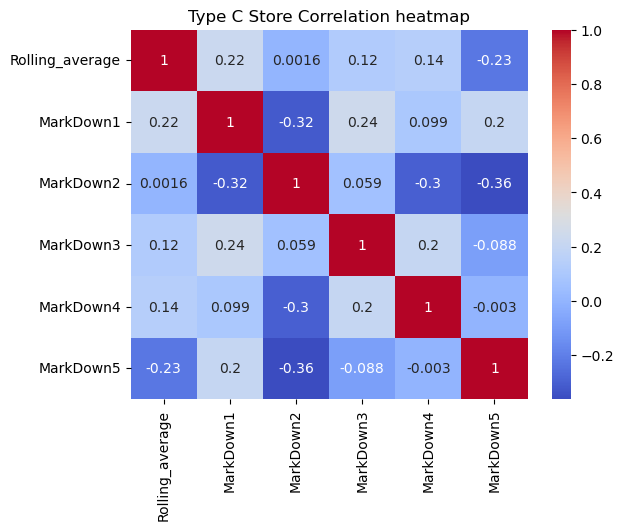

In [165]:
for i, df in enumerate(dfs):
    sns.heatmap(df.drop('Weekly_Sales', axis = 1).select_dtypes('float').corr(), cmap = 'coolwarm', annot = True)
    plt.title(f'Type {types[i]} Store Correlation heatmap')
    plt.show()

- 對於 A 與 B 類店鋪，只有折扣事件 3 與 5 與 4 週向前滾動平均銷售呈現較高相關。  
- 對於 C 類店鋪，沒有任何變數與銷售呈顯著相關。  


## 線性回歸模型  
接著建立線性回歸模型，檢驗相關性的統計顯著性，考慮事項如下：  
- 折扣事件 2 缺失約 30% 資料，不適合作為變數。  
- 目標非變數的預測能力，而是變數間關係，故使用簡單線性回歸。（嘗試過多種資料轉換，結果類似或更差。）  
- A 與 B 類店鋪中，折扣事件 1 與 4 相關係數高達 0.92，且折扣事件 1 缺失較少，因此排除折扣事件 4。  
- 最終模型為：滾動平均銷售 ~ 折扣事件 1 + 折扣事件 3 + 折扣事件 5  

In [168]:
# Linear Regression
# See the above explanation

# Store Type A Linear Regression
X = sales_md_A[['MarkDown1', 'MarkDown3', 'MarkDown5']] 
y = sales_md_A['Rolling_average']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print('\nType A Store Linear Regression')
print(model.summary())

# Store Type B Linear Regression
X = sales_md_B[['MarkDown1', 'MarkDown3', 'MarkDown5']] 
y = sales_md_B['Rolling_average']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print('\nType B Store Linear Regression')
print(model.summary())

# Store Type C Linear Regression
X = sales_md_C[['MarkDown1','MarkDown3','MarkDown4','MarkDown5']] # MD1 and MD4 have lower correlation for Type C Stores
y = sales_md_C['Rolling_average']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print('\nType C Stores Linear Regression')
print(model.summary())


Type A Store Linear Regression
                            OLS Regression Results                            
Dep. Variable:        Rolling_average   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     8.559
Date:                Fri, 25 Jul 2025   Prob (F-statistic):           0.000132
Time:                        16:13:03   Log-Likelihood:                -778.56
No. Observations:                  49   AIC:                             1565.
Df Residuals:                      45   BIC:                             1573.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.88e+0

### 結果（線性回歸）  
以4週滾動平均及95%信心水準，模型中各變數的p值如下：  

| 變數        | A類店鋪     | B類店鋪     | C類店鋪     |
|-------------|-------------|-------------|-------------|
| 折扣事件 1  | 0.697       | 0.612       | 0.077       |
| 折扣事件 2  | —           | —           | —           |
| 折扣事件 3  | 0.001       | 0.000       | 0.967       |
| 折扣事件 4  | —           | —           | 0.446       |
| 折扣事件 5  | 0.000       | 0.000       | 0.060       |

- **重要** 線性模型中，折扣事件 5 的係數顯著高於其他事件，表示單位折扣事件 5 促銷量與銷售增幅的關聯最大，故其 ROI 最高。  

# 問題 2  
- 若嘗試不同長度的滾動期間（使用其他週數計算向前滾動平均）會如何？  
- 何時為衡量折扣事件效果的最佳時間點？  

此問題有助於公司更精準地衡量未來促銷活動的成效或進行A/B測試。  

In [169]:
# Testing rolling period from 1 to 10 (1 means no rolling average)

rolling_periods = range(1, 11)
# Prepare empty DataFrames
pvalues_A = pd.DataFrame(index=rolling_periods, columns=['MarkDown1', 'MarkDown3', 'MarkDown5'])
pvalues_B = pd.DataFrame(index=rolling_periods, columns=['MarkDown1', 'MarkDown3', 'MarkDown5'])
pvalues_C = pd.DataFrame(index=rolling_periods, columns=['MarkDown1', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
pvalues_A.index.name = 'Rolling period'
pvalues_B.index.name = 'Rolling period'
pvalues_C.index.name = 'Rolling period'


for i, rolling_period in enumerate(rolling_periods):
    # Create tables of different rolling periods 
    sales_md_A = merge_sales_md(create_rolling_average(sales_A, rolling_period), features_md_A)
    sales_md_B = merge_sales_md(create_rolling_average(sales_B, rolling_period), features_md_B)
    sales_md_C = merge_sales_md(create_rolling_average(sales_C, rolling_period), features_md_C)

    # Linear regression
    # Store Type A Linear Regression
    X = sales_md_A[['MarkDown1', 'MarkDown3', 'MarkDown5']] 
    y = sales_md_A['Rolling_average']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    pvalues_A.loc[rolling_period] = model.pvalues.drop('const')

    # Store Type B Linear Regression
    X = sales_md_B[['MarkDown1', 'MarkDown3', 'MarkDown5']] 
    y = sales_md_B['Rolling_average']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    pvalues_B.loc[rolling_period] = model.pvalues.drop('const')

    # Store Type C Linear Regression
    X = sales_md_C[['MarkDown1','MarkDown3','MarkDown4','MarkDown5']] # MD1 and MD4 have lower correlation for Type C Stores
    y = sales_md_C['Rolling_average']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    pvalues_C.loc[rolling_period] = model.pvalues.drop('const')

# Display the results
print('\n Store Type A p-values:')
display(pvalues_A.astype(float).round(2))
print('\n Store Type B p-values:')
display(pvalues_B.astype(float).round(2))
print('\n Store Type C p-values:')
display(pvalues_C.astype(float).round(2))


 Store Type A p-values:


,MarkDown1,MarkDown3,MarkDown5
Rolling period,,,
1,0.74,0.00,0.70
2,0.90,0.03,0.24
3,0.98,0.01,0.02
4,0.70,0.00,0.00
5,0.84,0.00,0.00
6,0.90,0.00,0.01
7,0.78,0.00,0.02
8,0.93,0.00,0.08
9,1.00,0.01,0.15



 Store Type B p-values:


,MarkDown1,MarkDown3,MarkDown5
Rolling period,,,
1,0.47,0.00,0.24
2,0.59,0.01,0.03
3,0.73,0.00,0.00
4,0.61,0.00,0.00
5,0.74,0.00,0.00
6,0.91,0.00,0.00
7,0.95,0.00,0.01
8,0.89,0.00,0.03
9,0.86,0.01,0.05



 Store Type C p-values:


,MarkDown1,MarkDown3,MarkDown4,MarkDown5
Rolling period,,,,
1,0.39,0.17,0.84,0.15
2,0.13,0.14,0.78,0.80
3,0.53,0.22,0.60,0.84
4,0.08,0.97,0.45,0.06
5,0.02,0.42,0.72,0.05
6,0.02,0.23,0.80,0.21
7,0.33,0.30,0.60,0.09
8,0.06,0.87,0.25,0.00
9,0.35,0.41,0.36,0.04


# 洞察 3  
- 對於 A 類店鋪，  
    - 衡量折扣效果的最佳滾動期間為 4-5 週。  
    - 折扣事件 1 對銷售無明顯影響。  
    - 折扣事件 3 在不同滾動期間皆有穩定強烈效果。  
    - 折扣事件 5 在事件發生後第 3-7 週影響最強。  
- 對於 B 類店鋪，  
    - 整體結果與 A 類相似。  
    - 折扣事件 3 與 5 的效果略高於 A 類。  
- 對於 C 類店鋪，  
    - 折扣事件 1 在使用 5 或 6 週滾動平均銷售時對銷售有顯著影響。  
- 備註：對於 C 類型商店，Markdown 5 雖然在統計上顯著，但其係數為 負值，這與直覺不符。
此結果可能受到資料特性或時間序列結構的影響。因此，需要審慎解讀，並搭配其他尚未納入模型的變數進一步驗證與探討。



## 結論  

1. **店鋪類型為促銷影響銷售的關鍵因素** — 不同店鋪類型對不同折扣策略反應不同。  
2. **測量時間很重要** — 促銷效果需在適當的時間範圍內測量時最為明顯。  
3. 對於 **A 與 B 類店鋪**：  
   - 折扣事件 3 與 5 最有效，且折扣事件 5 投資報酬率最高。  
   - 其效果以 4–5 週滾動平均銷售量衡量最佳。  
4. 對於 **C 類店鋪**：  
   - 折扣事件 1 與銷售關係最強  
   - 折扣事件 1：5–6 週滾動平均  
5. 以上是我的分析，未來若有更多資料，可進一步建模或探索其他變數（如定價、假期、季節性）以發掘更深入洞察。
